# 233510P | KOH JIAH YHIN NIXON
Hypothesis:  weather features (e.g., humidity, pressure, wind) can reliably predict rainfall events.

# 1 | Get Data
Program gets data and prints out head, description and null values to get a basic understanding on what we are working with and that the data is safely loaded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('weatherHistory.csv')

#Sample Data
display(df.head())

#Quick Summary of data
display(df.describe())

#Finding Null Values
display(df.isnull().sum())

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


# 2 | Process the Data
Based on the basic understanding of the data,
1. we remove the NA columns in Precip Type
2. We remove Loud Cover as all data points are '0'
3. Delete Daily summary due to its extreme specific nature.
4. Delete Duplicates just in case there are multiple timestamps captured
5. Clean up Formatted date to ensure timezone and timings are properly aligned
6. Removed Pressure below 130 (130 is value for human to survive)

In [ ]:

#Drop empty precip type
df.dropna(subset=["Precip Type"], inplace=True)

#Drop Loud Cover Column since its all same value.
#Removing Daily Summary because the values are too specific so i wont be using it
#Removing Apparent temperature as its subjective and too closely related to temperature
df.drop(["Loud Cover", "Daily Summary", "Apparent Temperature (C)"], axis=1, inplace=True)

#Drop Duplicates
df.drop_duplicates(inplace=True)

#Fromatting Date Appropriately
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format="%Y-%m-%d %H:%M:%S.%f %z", errors='coerce', utc=True) #Found different timezones.
df['Formatted Date'] = df['Formatted Date'].dt.tz_convert('Europe/Berlin') #original data was mostly +0200. Converting all to +0200

# Limiting Pressure
df = df[(df['Pressure (millibars)'] > 130)]

Decided on a binary class. From previous attempts, Multiclass was not suitable as each class has low representation and generalization often led to sampling imbalance.
For the code below, I:
1. Combined the Summary into a binary class where True if it rained for that day and False if there was no rain on that day.
2. Count the values of Rain vs no Rain
3. Presented it in a pie chart and it shows that the city only receives about than 1% of Rain.


/tmp/ipython-input-488116982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
/tmp/ipython-input-488116982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain'] = np.where(df['Summary'].str.contains('rain', case=False), 1, 0)


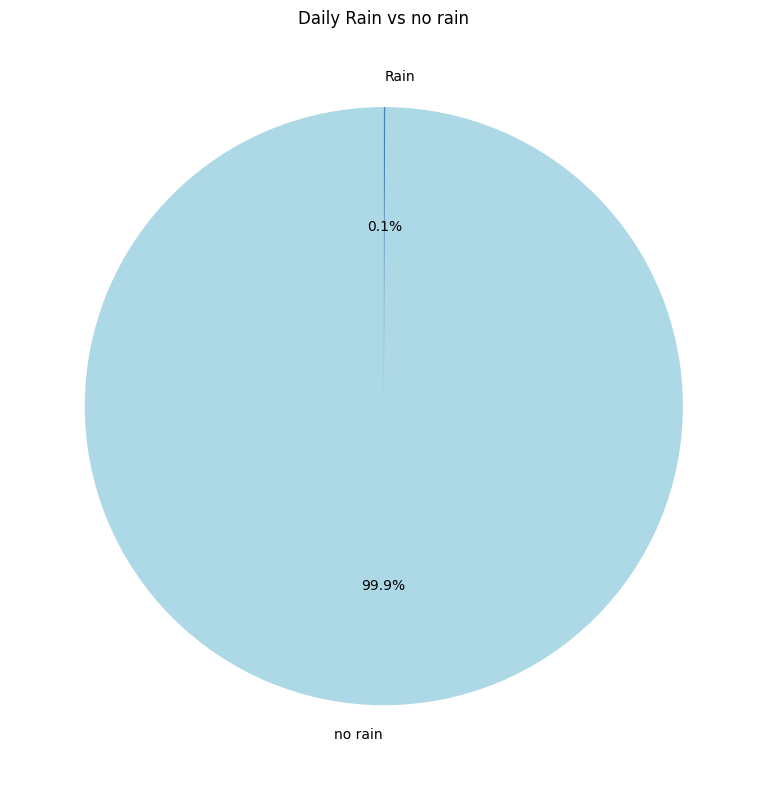

In [ ]:

# Convert 'Formatted Date' to datetime objects to ensure correct grouping
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

# Create the 'Rain' column based on the presence of "rain"
df['Rain'] = np.where(df['Summary'].str.contains('rain', case=False), 1, 0)

# Group by date and determine if there was rain on that day
daily_rain = df.groupby('Formatted Date')['Rain'].max().reset_index()

# Count the occurrences of rain and no rain from the 'Rain' column
rain_counts = daily_rain['Rain'].value_counts()

# Map the binary values to labels for the pie chart
labels = ['no rain', 'Rain']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rain_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#4682B4'])
plt.title('Daily Rain vs no rain')
plt.ylabel('') # This is to remove the default 'count' label
plt.tight_layout()
plt.show()
df.drop("Summary", inplace=True, axis=1)

# 3 | Explore Data
The code below are used for me to explore the data, this will assist me in making decisions on how to process the data to better fit the model.
For the Code below, I :
1. Used Seaborn library to plot a Correlation heatmap to have a better understanding of how each feature relate to each other.

Findings:
1. Temperature and Apparent Temperature has a high correlation, which is expected as humans can easily tell apart from warmer and colder days but not be able to give an exact and accurate reading.
2. Temperature seems to have a relatively high correlation with Visibility, this could be because fogs throughout the day makes it feel cooler.
3. There are also quite a high negative correlation between Temperature Vs Humidity. A possible explanation for this is how as humans, our perspective of temperature negatively impacted by the humidity, as higher humidity might make us sweat more, making us feel warmer.
4. These data gathered can allow us to consider interactions between different features.
5. I have rejected Temperature * Visibility and Temperature * Humidity as it negatively impacted the accuracy of the model despite their correlations.

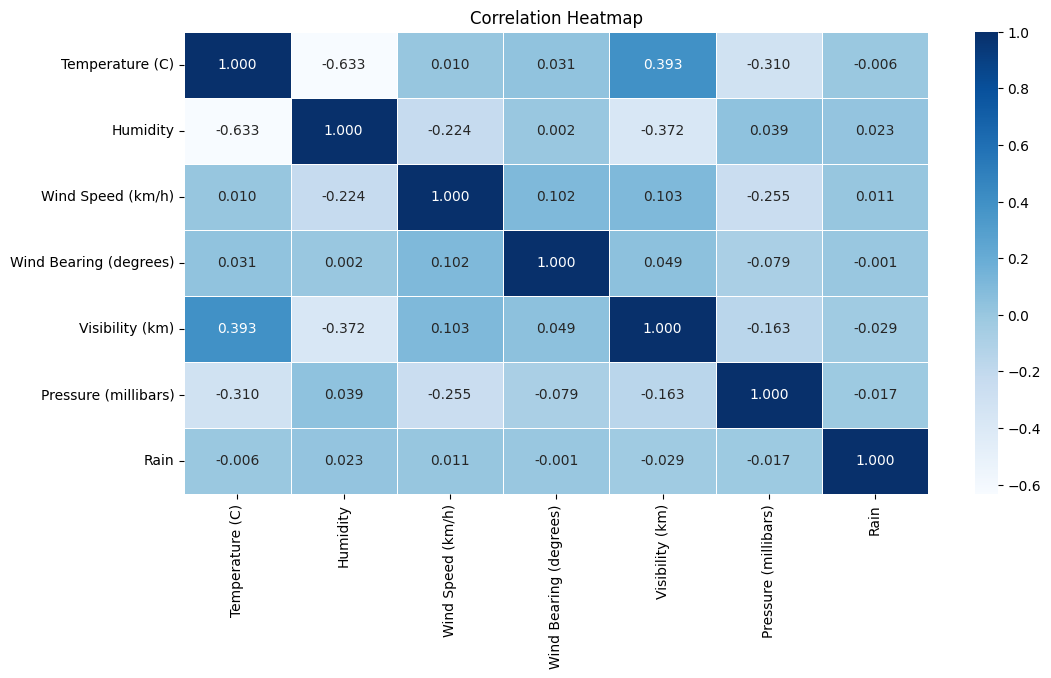

In [ ]:
#Explore Data
# Build a Correlation heatmap
import seaborn as sns
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 6))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Stacked wind-rose chart.
This is used to visualise the average wind speed by wind direction over the years.
here are my findings:
1. There are no missing years without wind measurement
2. Wind is much stronger from North-North-West, North-North-East and South-East-East
3. The above observation is backed up by its geographical location. the Tisza river flows from north to south, and skims along the east as well. which suggests stronger winds from that direction.
4. the terrain around Szeged is mostly flat, with a few cities in the direction of weaker winds as shown in the graph.
4. The wind speed and wind direction seems to be relatively consistent across the years, does not seem to have much change.

Szeged's Geographical location: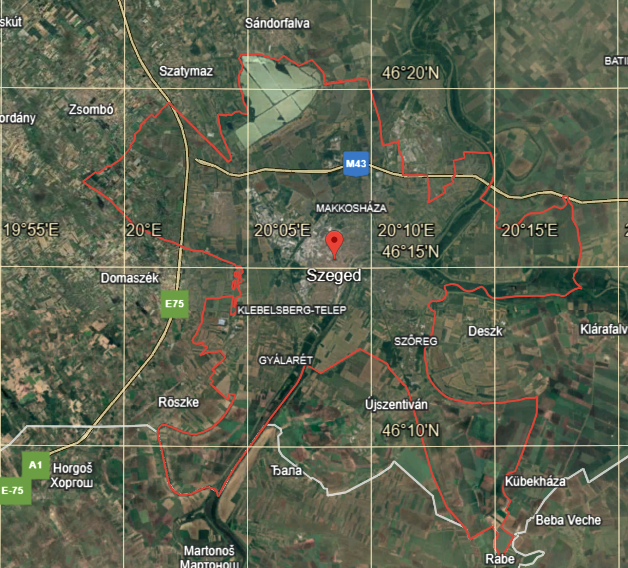

/tmp/ipython-input-2735023490.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


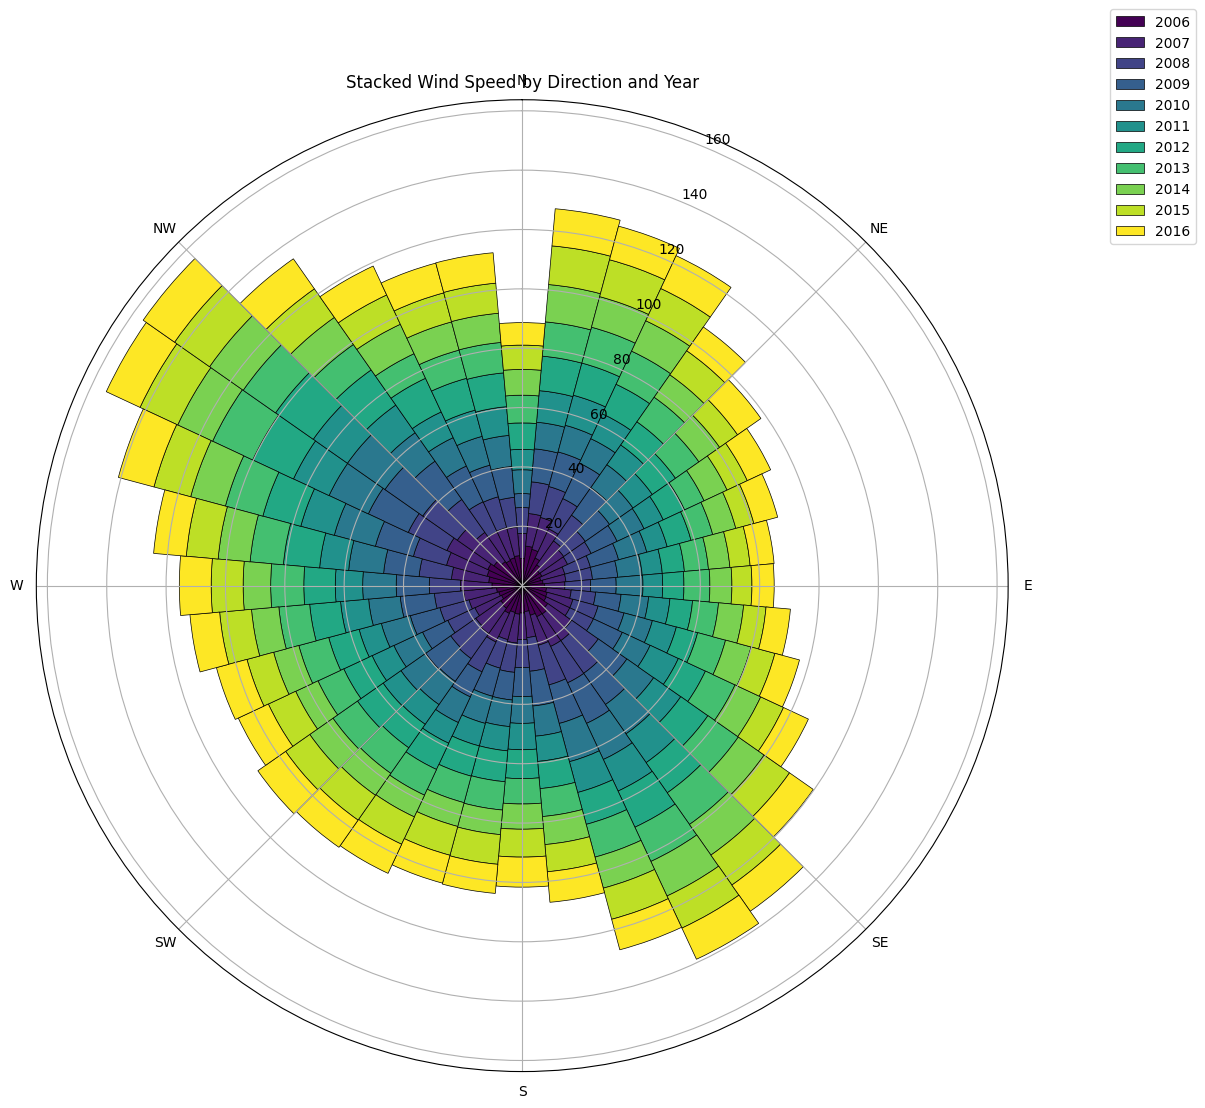

In [ ]:
# Prepare the binning
bins = 36
degrees_per_bin = 360 / bins
bin_edges = np.linspace(0, 360, bins + 1)
bin_labels = np.arange(0, 360, degrees_per_bin)

# Create binned wind bearing column
df['Wind Bearing Bins'] = pd.cut(
    df['Wind Bearing (degrees)'],
    bins=bin_edges,
    right=False,
    labels=bin_labels,
    include_lowest=True
)

# Extract year from date
df['Year'] = pd.to_datetime(df['Formatted Date']).dt.year

# Calculate average wind speed by bearing bin and year
pivot = df.pivot_table(
    index='Wind Bearing Bins',
    columns='Year',
    values='Wind Speed (km/h)',
    aggfunc='mean'
).fillna(0)

# Convert index to float for plotting
angles_deg = pivot.index.astype(float)
angles_rad = np.deg2rad(angles_deg)

# Plot stacked line chart on polar coordinates
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})

# Set colors and plot lines
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot.columns)))
bottom = np.zeros(len(pivot))

for year, color in zip(pivot.columns, colors):
    ax.bar(angles_rad, pivot[year], width=np.deg2rad(degrees_per_bin), bottom=bottom,
           label=str(year), color=color, edgecolor='k', linewidth=0.5)
    bottom += pivot[year].values


# Customize direction labels
directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
angles = np.deg2rad(np.arange(0, 360, 45))
ax.set_xticks(angles)
ax.set_xticklabels(directions)

# Styling
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Stacked Wind Speed by Direction and Year', va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Clean up temporary columns
df.drop(['Wind Bearing Bins', 'Year'], axis=1, inplace=True)

# Show plot
plt.tight_layout()
plt.show()

created a boxplot to find outliers and IQR. this gives me a good idea of how realistic the measurements are and help me decide how the data should be scaled.
1. Temperature and apparent temperature are within possible range. Szeged experiences both intense summers and winters.
2. Humidity. 0 humidity is not possible. will be removing it.
3. Speed, although 50km/hr is rare, it is still possible Szeged. therefore will be keeping it there. Mean is about 10km/hr, which is believeable data.
4. Wind bearing is within 0 and 360, which is within realistic measurements
5. Visibility is within normal ranges as well
6. Pressure has alot of outlier data. but abit of research shows that within 950 to 1040 is normal. values of 1040 and above are rare, but still possible for Szeged.

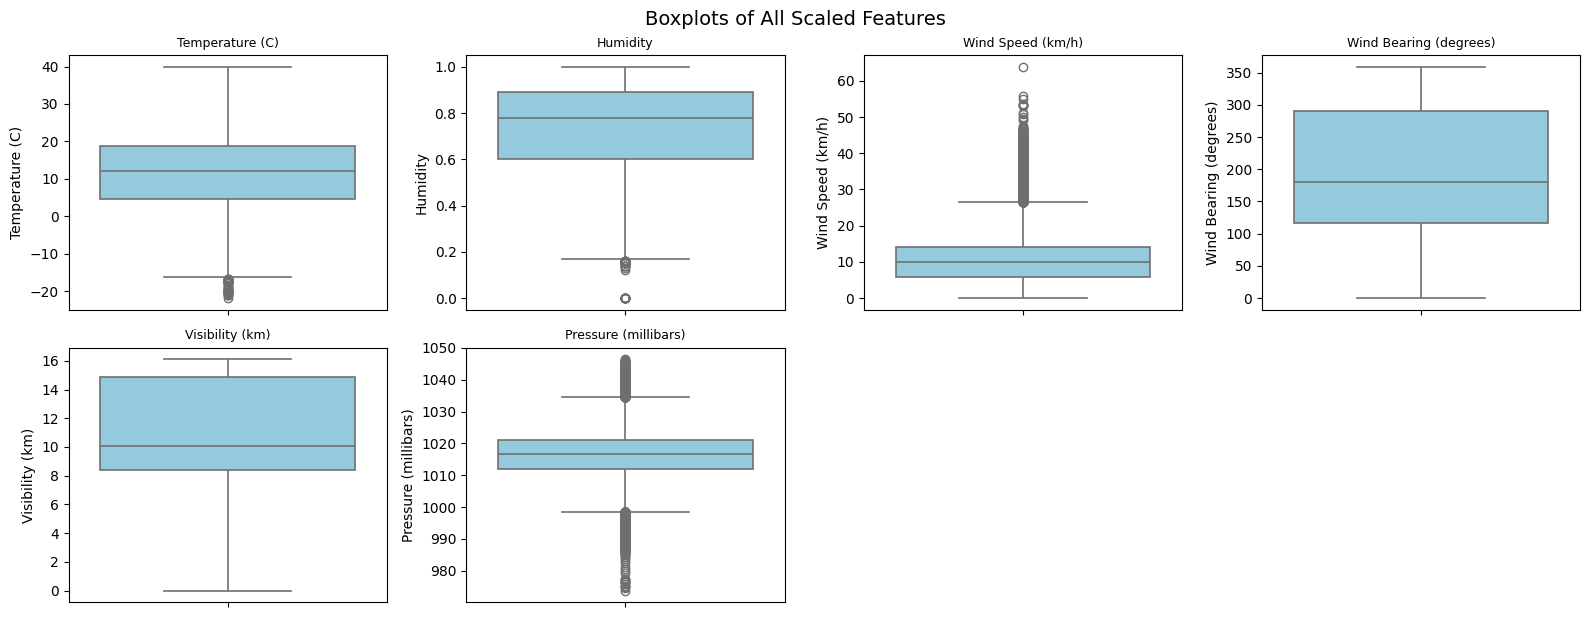

In [ ]:

# Select only numerical columns (excluding target label)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Rain' in numerical_cols:
    numerical_cols.remove('Rain')  # Remove target if present

# Layout: Auto-calculate grid shape
n_cols = 4  # You can adjust based on your screen size
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Set plot size
plt.figure(figsize=(n_cols * 4, n_rows * 3))

# Create subplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='skyblue', linewidth=1.2)
    plt.title(col, fontsize=9)
    plt.tight_layout()

plt.suptitle("Boxplots of All Scaled Features", fontsize=14, y=1.02)
plt.show()


Extracted time features, this was done so that the model will have a better understanding of time as a context. this is important as different timing will affect the environmental factors.

For example, morning and nights tend to be cooler and less humid than in the afternoon, especially when Szeged is near a river. Wind Bearing and Temperature are different in each month, especially when Szeged is a seasonal city. Average temperatures are also more likely to rise due to global warming. so the code below has introduced time as a context to the model.

In [ ]:
pd.options.mode.chained_assignment = None
# Remove outlier for humidity
df = df[(df['Humidity'] > 0.1)]


def extract_time_features(df, datetime_col='Formatted Date', drop_original=True):
    df[datetime_col] = pd.to_datetime(df[datetime_col], utc=True)

    # Extract raw time components
    df['Year'] = df[datetime_col].dt.year
    df['Month'] = df[datetime_col].dt.month
    df['Day'] = df[datetime_col].dt.day
    df['Hour'] = df[datetime_col].dt.hour
    df['Week'] = df[datetime_col].dt.isocalendar().week
    # Convert 'Week' and 'Week_cos' to float64
    df['Week'] = df['Week'].astype(np.float64)
    # Add cyclical encodings for selected time features

    if drop_original:
        df.drop(columns=[datetime_col], inplace=True)

    return df


df = extract_time_features(df, datetime_col='Formatted Date', drop_original=True)


#Drop Precip Type.
df.drop("Precip Type", axis=1, inplace=True)
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Rain,Year,Month,Day,Hour,Week
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,2006,3,31,22,13.0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,2006,3,31,23,13.0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,2006,4,1,0,13.0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,2006,4,1,1,13.0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,2006,4,1,2,13.0


The code below allows us to visualise any skewness of data and adjust for it. in this case,
1. Humidity is very Right Skewed
2. Also added a Skewness factor to remove human biases and skewness should be handled programmatically.

Findings:
3. Windspeed is Left Skewed
4. I also Noticed there are scaling issue, where is also reflected on block 2 (99:1 NoRain:Rain pie chart)
5. I also noticed that it tend to rain more during October, which is their Autumn Season, And [external data](https://weatherspark.com/m/85919/10/Average-Weather-in-October-in-Szeged-Hungary#Figures-Rainfall) seems to support my assumption as they tend to have cooler temperatures during Autumn, which may cause more rainfall.


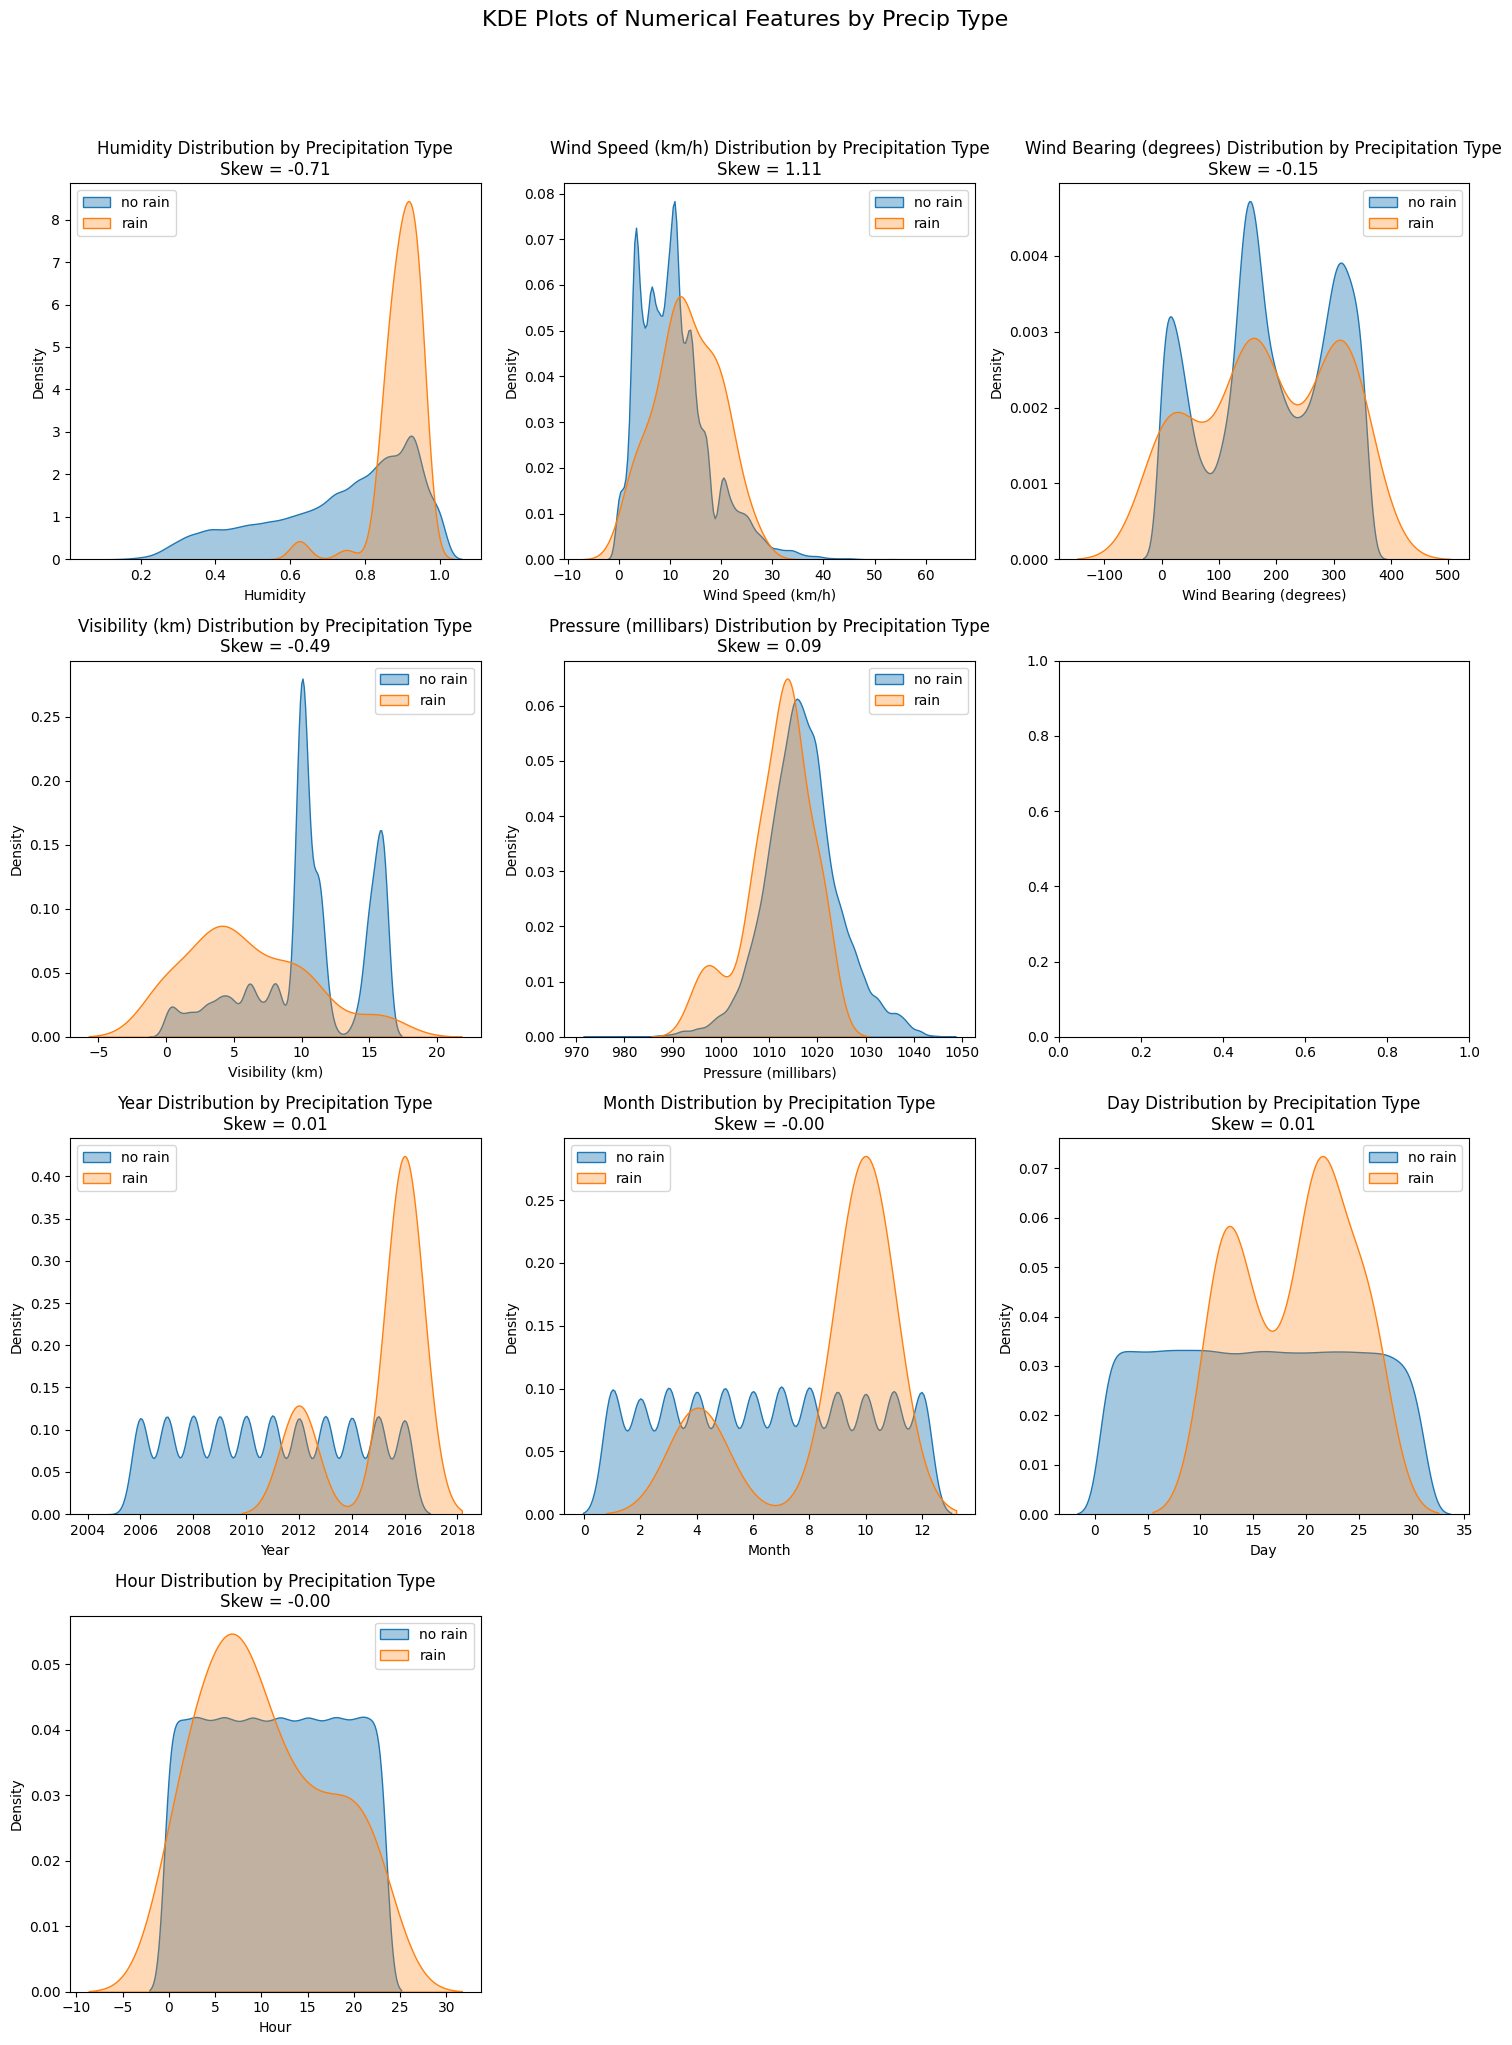

In [ ]:
import seaborn as sns

numerical_cols = df.select_dtypes(include='number').columns.tolist()[1:]

num_cols_per_row = 3
num_numerical = len(numerical_cols) - 1
num_rows = (num_numerical + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 5), sharex=False, sharey=False)
axes = axes.flatten()

for i, col_name in enumerate(numerical_cols):
    if col_name == "Rain":
        continue
    if i < len(axes):
        skew_val = df[col_name].skew()
        sns.kdeplot(data=df[df['Rain'] == 0], x=col_name, label='no rain', fill=True, alpha=0.4, ax=axes[i])
        sns.kdeplot(data=df[df['Rain'] == 1], x=col_name, label='rain', fill=True, alpha=0.3, ax=axes[i])
        axes[i].set_title(f'{col_name} Distribution by Precipitation Type\nSkew = {skew_val:.2f}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel("Density")
        axes[i].legend()

# Hide any unused subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('KDE Plots of Numerical Features by Precip Type', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


Added:
1. Fixed Skewness using transformers.
1. Sin and Cos Encoding to the timestamps. this will better assist the model to understand the "cyclical" nature of time and make better predictions with time concepts.
2. Added Lags, added this as even before it rains, there is a change to the environment and the model should be able to better understand the context of past data to make predictions for the future.
3. Added Scaling. Rationale behind it was the 1:99 ratio for the target class and im planning to solve it using SMOTE. Scaling helps with SMOTE since SMOTE generates synthetic samples by interpolating between nearest neighbors and this will reduce distortion and Biasness when training the model.
4. Used Min/Max Scaling for humidity since it is a 0~1 value.
5. Used Robust Scaling for Wind Speed and Pressure due to outliers present in the box plot graphs.
6. Used Standard Scaling on Temperature, Apparent Temperature, Visibility and Wind bearing due to low outliers present and its not on a 0~1 Scale.

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def fix_skewness(df, columns, skew_thresh=1.0):
    transforms = {}
    for col in columns:
        skew_val = df[col].skew()
        if abs(skew_val) < skew_thresh:
            continue

        if (df[col] > 0).all():
            if skew_val > 1.5:
                df[col] = np.log1p(df[col])
                transforms[col] = 'log1p'
            elif 1.0 < skew_val <= 1.5:
                df[col] = np.sqrt(df[col])
                transforms[col] = 'sqrt'
            else:
                pt = PowerTransformer(method='yeo-johnson')
                df[[col]] = pt.fit_transform(df[[col]])
                transforms[col] = 'yeo-johnson'
        else:
            pt = PowerTransformer(method='yeo-johnson')
            df[[col]] = pt.fit_transform(df[[col]])
            transforms[col] = 'yeo-johnson'

    return df, transforms


df, applied_transforms = fix_skewness(df, numerical_cols)

# 1. Cyclical Encoding (No change needed)
def cyclical_encode(series, max_val):
    return np.sin(2 * np.pi * series / max_val), np.cos(2 * np.pi * series / max_val)

for col, max_val in {'Hour': 24, 'Day': 31, 'Week': 53, 'Month': 12}.items():
    df[f'{col}_sin'], df[f'{col}_cos'] = cyclical_encode(df[col], max_val)

df['Week_cos'] = df['Week_cos'].astype(np.float64)

# 2. Create lag features
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']
for feat in features:
    for lag in [1, 2, 3]:
        df[f'{feat}_lag{lag}'] = df[feat].shift(lag)

df.dropna(inplace=True)

# 3. Scale feature + lag variants using SAME scaler
# Define scalers for each feature group
scalers = {
    'Temperature (C)': StandardScaler(),
    'Wind Bearing (degrees)': StandardScaler(),
    'Humidity': MinMaxScaler(),
    'Wind Speed (km/h)': RobustScaler(),
    'Visibility (km)': StandardScaler(),
    'Pressure (millibars)': RobustScaler()
}

# Apply scalers to each base feature and their lags
for feat, scaler in scalers.items():
    # Find all columns related to the feature (including lags)
    cols_to_scale = [col for col in df.columns if col.startswith(feat)]
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


# 4 | Model Training
1. Rain is the binary target class used
2. Splitting to 80:20 as it is a common practice. Originally added shuffle=False for a time series based model but have resulted in extremely poor results.
3. Training and Testing Data are resampled using SMOTE as it no longer uses Time Series.
4. Model Chosen is Random Forest classifer for its relative speed and adaptability (dont need to do hypertuning, not sensitive to hyperparameters). this gives me a strong baseline on what to expect for my hypertuned model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# --- Label encode binary target ---
y = df['Rain']
X = df.drop(columns=["Rain"])
y = y.astype(int)
# --- Time-aware split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Handle class imbalance using SMOTE ---
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

# --- Train model ---
model = RandomForestClassifier(class_weight=None, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 5 | Evaluation
Evaluation with a confusion matrix and a Classification report
1. Classification report
- Score is averaged at about 89% Accuracy, which is considered very high and reliable model.

              precision    recall  f1-score   support

        Rain       0.82      1.00      0.90     18911
     No Rain       1.00      0.78      0.88     18911

    accuracy                           0.89     37822
   macro avg       0.91      0.89      0.89     37822
weighted avg       0.91      0.89      0.89     37822



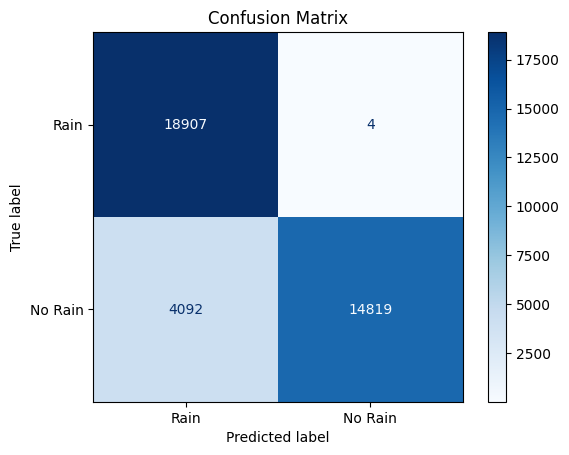

In [ ]:

from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, average_precision_score, f1_score
)
# --- Evaluate ---
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, target_names=['Rain', 'No Rain'], zero_division=0))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rain', 'No Rain'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 5 | Model Hyper Parameter Tuning
1. Used XGBoost Model as my final Model as although it is slower, it is more robust than a decision tree classifier.
2. Used GridSearch to find the best performing Combination of parameters for the model.
3. The numbers in the Parameter grid are chosen due to already fine tuned parameters from previous attempts.
4. the Weighted-f1 results is significantly higher, at 95%, which shows an improvement and additional robustness of XGBoost over Random forest Classifier.

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False,  random_state=42, n_estimators=1000, max_depth=3, learning_rate=0.5, subsample=0.5)
y_train = y_train.replace(35, 1)
y_test = y_test.replace(35, 1)

# # Parameter Grid
# param_grid = {
#     'n_estimators': [100, 150, 200, 300, 500, 10000],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.001, 0.1, 0.5],
#     'subsample': [0.2, 0.5],
# }

# # Stratified CV
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Grid Search
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
#                            cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Best Model
# best_xgb = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)

xgb.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:30:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18911
           1       1.00      0.90      0.95     18911

    accuracy                           0.95     37822
   macro avg       0.95      0.95      0.95     37822
weighted avg       0.95      0.95      0.95     37822



For better Interpreteability of the result, i did SHAP.
Findings:
1. Temporal variables (Year, Week, Week_sin, Day_sin) are highly influential, suggesting strong seasonal and long-term patterns in rain occurrence.
2. Year shows strong SHAP spread, implying model learns from year-over-year climate variation (e.g. long-term warming, El Niño).
3. Day_sin and Week_sin indicate cyclical weekly/daily patterns—possibly due to human-related activity (e.g. urban heat, emissions) or cyclical meteorological behavior.
4. Visibility (km) has a high SHAP magnitude; low visibility (blue) often pushes predictions toward rain, confirming fog/smog precedes rain.
5. Temperature (C) and its lag (Temperature_lag3) both have strong SHAP influence; cooler temps (blue) more likely to indicate rain conditions, possibly due to cloud cover or pre-storm cooling.
6. Humidity is impactful—higher humidity (red) generally pushes model toward predicting rain, as expected.
7. Wind Speed_lag3 shows a subtler but present effect; may relate to frontal systems approaching with lagged wind changes.
8. Lagged variables show up (Temperature_lag3, Wind Speed_lag3), reinforcing temporal causality—past weather contributes to predicting current rain.
9. Remaining 22 features contribute collectively but not dominantly—suggests marginal gains from those inputs or redundancy.

100%|===================| 37676/37822 [03:04<00:00]       

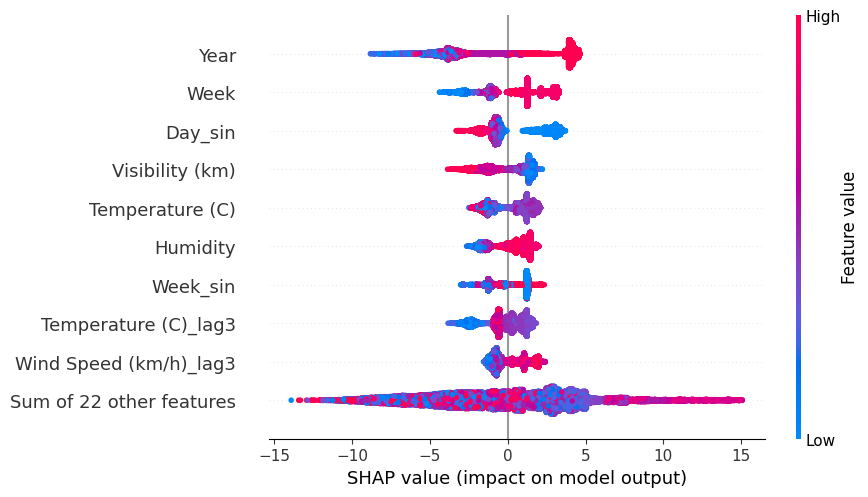

In [ ]:
import shap
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

# 6 | Conclusion
Hypothesis: Weather features (e.g., humidity, pressure, wind) can reliably predict rainfall events.

The hypothesis that meteorological features can predict rain was validated by the XGBoost model achieving 0.95 F1-score. However, model interpretability suggests that some features dominate prediction, indicating potential overfitting or leakage. To improve generalizability, future work could introduce lag differentials, temporal aggregation, and regularization techniques. Additionally, deployment could benefit infrastructure planning by forecasting rainfall surges and informing dynamic storm drain activation in smart cities.